# Relationships Between Categoriacal Variables

## Types of Data

| Type         | On Disk   | In Python |
|--------------|-----------|-----------|
| tabular      | CSV       | DataFrame |
| hierarchical | JSON      | dict      |
| textual      | plaintext | string    |
| geospatial   | ???       | ???       |

## Review: One Categorical Variable

In [1]:
# Types of Variables
import pandas as pd

# get dataframe from file
df = pd.read_csv('data/titanic.csv')
df

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",3,0,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,"Zabour, Miss. Thamine",3,0,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",3,0,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,"Zakarian, Mr. Ortin",3,0,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


pclass
3    709
1    323
2    277
Name: count, dtype: int64


<Axes: xlabel='pclass'>

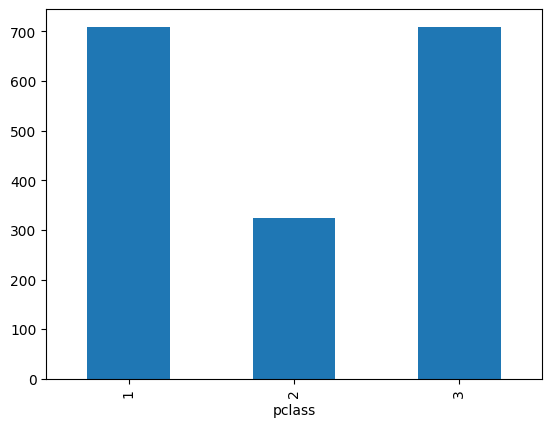

In [2]:
# summarize one column
print(df['pclass'].value_counts())
# visualize one column
df['pclass'].value_counts().plot(kind='bar')
# vizualize one column with sorting
df['pclass'].value_counts().sort_index().plot(kind='bar')

## Two (or More) Categorical Variables

In [3]:
# return one-dimensional Series
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [4]:
# select multiple columns by passing a list
df[['pclass', 'survived']]

,pclass,survived
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
1304,3,0
1305,3,0
1306,3,0
1307,3,0


In [5]:
# Summarizing Multiple Categorical Variables
# get counts of every possible combination of two columns
df[['pclass', 'survived']].value_counts()

pclass  survived
3       0           528
1       1           200
3       1           181
2       0           158
1       0           123
2       1           119
Name: count, dtype: int64

In [ ]:
# create a cross-tabulation of two columns
df[['pclass', 'survived']].value_counts().unstack()

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


<Axes: xlabel='pclass'>

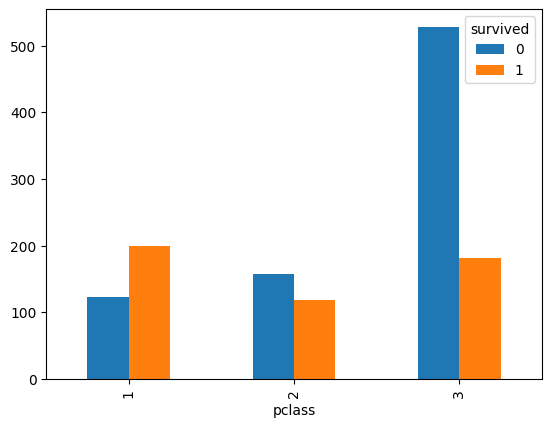

In [ ]:
# create a bar plot of the cross-tabulation (grouped bar plot)
df[['pclass', 'survived']].value_counts().unstack().plot(kind='bar')

In [9]:
# sum over the rows of the crosstab
crosstab = df[['pclass', 'survived']].value_counts().unstack()
crosstab.sum(axis="rows")

survived
0    809
1    500
dtype: int64

## Proportions

단순 count 대신 사용함

$$ proportion = count / total $$

In [ ]:
# the proportion of the three passenger classes
# notice: the values in the distribution add up to 1
df['pclass'].value_counts(normalize=True).sort_index()

pclass
1    0.246753
2    0.211612
3    0.541635
Name: proportion, dtype: float64

## Probabilities

"The proportion of passengers in 3rd class is 0.541635."


equals 


"If we were to pick a passenger on the Titanic at random, the probability that they are in 3rd class is 0.541635."

Notation: 

$$
P(3rd class) = 0.541635
$$
or,
$$
P(pclass = 3) = 0.541635
$$

## Vectorization

In pandas, operations are **vectorized.**
(vector처럼 연산됨)

## Joint and Conditional Distributions

In [ ]:
# Calculate the distribution of multiple variables
# 결합(확률)분포 : 모든 조건이 동시에 성립할 확률분포
df[['pclass', 'survived']].value_counts(normalize=True).unstack().sort_index()

survived,0,1
pclass,,
1,0.093965,0.152788
2,0.120703,0.090909
3,0.403361,0.138273


<Axes: xlabel='pclass'>

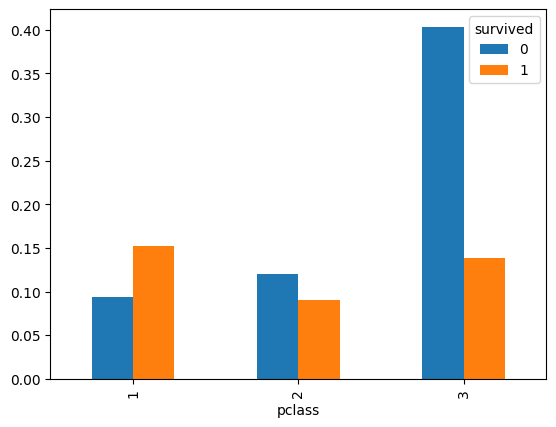

In [ ]:
# Visualizing joint distributions
# The y-axis scales changes from using value_counts(), 
# but the shape of the plot remains the same.
df[['pclass', 'survived']].value_counts(normalize=True).unstack().sort_index().plot(kind='bar')

In [ ]:
## Conditional Distribution
# 조건부 확률 분포 : 특정 조건이 주어졌을 때,
# 그 조건이 주어진 상황에서 다른 변수의 확률분포
# compare survival across the class
crosstab = df[['pclass', 'survived']].value_counts().unstack()
pclass_marginal = crosstab.sum(axis="columns")
# calculate the conditional distribution of survival given the passenger class
crosstab.div(pclass_marginal, axis="rows")

survived,0,1
pclass,,
1,0.380805,0.619195
2,0.570397,0.429603
3,0.744711,0.255289


<Axes: xlabel='pclass'>

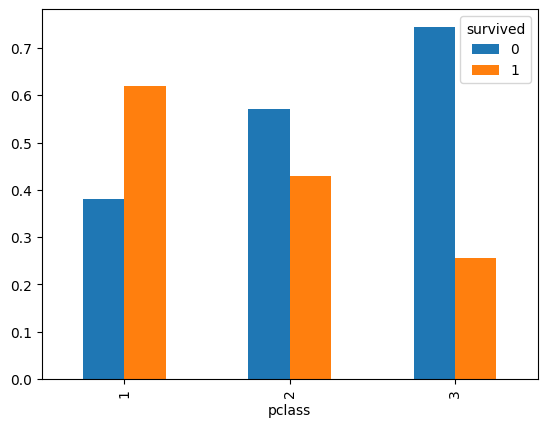

In [22]:
# visualizing the conditional distribution
crosstab.div(pclass_marginal, axis="rows").plot(kind='bar')

<Axes: xlabel='pclass'>

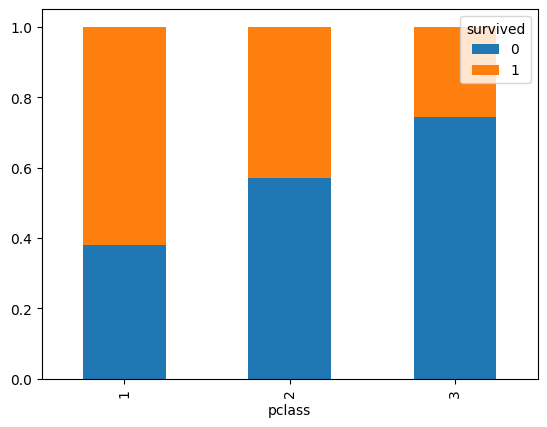

In [23]:
# stacked bar plot
crosstab.div(pclass_marginal, axis="rows").plot(kind='bar', stacked=True)

## Conditional Probabilities

"The conditional proportion of survival given 3rd class is 0.255289"

equals

"If we were to pick a 3rd class passenger on the Titanic at random, the probability that they survived is 0.255289."

Notation:
$$
P(survived|3rd class) = 0.255289
$$

or 

$$
P(survived = 1|pclass = 3) = 0.255289
$$